# Lab 09 - Neural Net for XOR

X = A XOR B

### Truth Table

|A|B|X|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [2]:
import numpy as np
import tensorflow as tf

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
        
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 0.704806 [[ 0.11971131]
 [ 0.56178486]]
100 0.696442 [[ 0.07319805]
 [ 0.30975649]]
200 0.694503 [[ 0.06546754]
 [ 0.19190966]]
300 0.693723 [[ 0.05311203]
 [ 0.12067135]]
400 0.693398 [[ 0.04061492]
 [ 0.07670826]]
500 0.693258 [[ 0.0299574 ]
 [ 0.04923936]]
600 0.693197 [[ 0.02157828]
 [ 0.03187904]]
700 0.693169 [[ 0.01528983]
 [ 0.02079269]]
800 0.693157 [[ 0.01070746]
 [ 0.01364715]]
900 0.693152 [[ 0.00743408]
 [ 0.00900448]]
1000 0.693149 [[ 0.00512827]
 [ 0.00596719]]
1100 0.693148 [[ 0.00352044]
 [ 0.00396863]]
1200 0.693148 [[ 0.00240771]
 [ 0.00264715]]
1300 0.693147 [[ 0.00164199]
 [ 0.0017699 ]]
1400 0.693147 [[ 0.00111729]
 [ 0.00118562]]
1500 0.693147 [[ 0.00075895]
 [ 0.00079545]]
1600 0.693147 [[ 0.00051487]
 [ 0.00053436]]
1700 0.693147 [[ 0.00034889]
 [ 0.00035931]]
1800 0.693147 [[ 0.00023621]
 [ 0.00024178]]
1900 0.693147 [[ 0.00015982]
 [ 0.0001628 ]]
2000 0.693147 [[ 0.00010808]
 [ 0.00010966]]
2100 0.693147 [[  7.30585962e-05]
 [  7.39027309e-05]]
2200 0.69314

In [3]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
        
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 1.19245 [[-0.48746619]
 [-0.37058759]]
100 0.692379 [[-0.48746619]
 [-0.37058759]]
200 0.680438 [[-0.48746619]
 [-0.37058759]]
300 0.671468 [[-0.48746619]
 [-0.37058759]]
400 0.662262 [[-0.48746619]
 [-0.37058759]]
500 0.651166 [[-0.48746619]
 [-0.37058759]]
600 0.637074 [[-0.48746619]
 [-0.37058759]]
700 0.6196 [[-0.48746619]
 [-0.37058759]]
800 0.599418 [[-0.48746619]
 [-0.37058759]]
900 0.577803 [[-0.48746619]
 [-0.37058759]]
1000 0.55562 [[-0.48746619]
 [-0.37058759]]
1100 0.532959 [[-0.48746619]
 [-0.37058759]]
1200 0.509386 [[-0.48746619]
 [-0.37058759]]
1300 0.484236 [[-0.48746619]
 [-0.37058759]]
1400 0.456837 [[-0.48746619]
 [-0.37058759]]
1500 0.426767 [[-0.48746619]
 [-0.37058759]]
1600 0.394107 [[-0.48746619]
 [-0.37058759]]
1700 0.359589 [[-0.48746619]
 [-0.37058759]]
1800 0.324509 [[-0.48746619]
 [-0.37058759]]
1900 0.290381 [[-0.48746619]
 [-0.37058759]]
2000 0.258511 [[-0.48746619]
 [-0.37058759]]
2100 0.229737 [[-0.48746619]
 [-0.37058759]]
2200 0.20439 [[-0.48746619

## Wide NN for XOR

In [4]:
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
        
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 0.702277 [[ 0.9049508 ]
 [-0.28652301]]
100 0.676952 [[ 0.9049508 ]
 [-0.28652301]]
200 0.661416 [[ 0.9049508 ]
 [-0.28652301]]
300 0.644719 [[ 0.9049508 ]
 [-0.28652301]]
400 0.625716 [[ 0.9049508 ]
 [-0.28652301]]
500 0.603554 [[ 0.9049508 ]
 [-0.28652301]]
600 0.577651 [[ 0.9049508 ]
 [-0.28652301]]
700 0.547701 [[ 0.9049508 ]
 [-0.28652301]]
800 0.51368 [[ 0.9049508 ]
 [-0.28652301]]
900 0.475876 [[ 0.9049508 ]
 [-0.28652301]]
1000 0.434942 [[ 0.9049508 ]
 [-0.28652301]]
1100 0.391942 [[ 0.9049508 ]
 [-0.28652301]]
1200 0.348342 [[ 0.9049508 ]
 [-0.28652301]]
1300 0.305842 [[ 0.9049508 ]
 [-0.28652301]]
1400 0.266051 [[ 0.9049508 ]
 [-0.28652301]]
1500 0.230156 [[ 0.9049508 ]
 [-0.28652301]]
1600 0.198753 [[ 0.9049508 ]
 [-0.28652301]]
1700 0.171888 [[ 0.9049508 ]
 [-0.28652301]]
1800 0.149236 [[ 0.9049508 ]
 [-0.28652301]]
1900 0.130284 [[ 0.9049508 ]
 [-0.28652301]]
2000 0.114467 [[ 0.9049508 ]
 [-0.28652301]]
2100 0.101252 [[ 0.9049508 ]
 [-0.28652301]]
2200 0.0901698 [[ 0.904

## Deep NN for XOR

In [6]:
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer1, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer1, W4) + b4)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
        
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 1.25844 [[-0.84153038]
 [ 0.43006295]]
100 0.694772 [[-0.84153038]
 [ 0.43006295]]
200 0.69098 [[-0.84153038]
 [ 0.43006295]]
300 0.687526 [[-0.84153038]
 [ 0.43006295]]
400 0.684085 [[-0.84153038]
 [ 0.43006295]]
500 0.680399 [[-0.84153038]
 [ 0.43006295]]
600 0.676236 [[-0.84153038]
 [ 0.43006295]]
700 0.67136 [[-0.84153038]
 [ 0.43006295]]
800 0.665517 [[-0.84153038]
 [ 0.43006295]]
900 0.658426 [[-0.84153038]
 [ 0.43006295]]
1000 0.649763 [[-0.84153038]
 [ 0.43006295]]
1100 0.639154 [[-0.84153038]
 [ 0.43006295]]
1200 0.626159 [[-0.84153038]
 [ 0.43006295]]
1300 0.610262 [[-0.84153038]
 [ 0.43006295]]
1400 0.590876 [[-0.84153038]
 [ 0.43006295]]
1500 0.567413 [[-0.84153038]
 [ 0.43006295]]
1600 0.539454 [[-0.84153038]
 [ 0.43006295]]
1700 0.506965 [[-0.84153038]
 [ 0.43006295]]
1800 0.470343 [[-0.84153038]
 [ 0.43006295]]
1900 0.430324 [[-0.84153038]
 [ 0.43006295]]
2000 0.388055 [[-0.84153038]
 [ 0.43006295]]
2100 0.345172 [[-0.84153038]
 [ 0.43006295]]
2200 0.303546 [[-0.841530

# Wide NN for MNIST

In [39]:
import numpy, os, urllib, gzip, tempfile, random
import matplotlib.pyplot as plt


SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'
TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'
TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

VALIDATION_SIZE = 5000

def _read32(bytestream):
    dt = numpy.dtype(numpy.uint32).newbyteorder('>')
    return numpy.frombuffer(bytestream.read(4), dtype=dt)[0]

def download(filename, workdir):
    if not os.path.exists(workdir):
        os.mkdir(workdir)

    filepath = os.path.join(workdir, filename)

    print('Downloading', SOURCE_URL + filename)
    urllib.request.urlretrieve(SOURCE_URL + filename, filename=filepath)
    return filepath

def extract_images(filepath):
    print('Extracting', filepath)
    with gzip.open(filepath) as bytestream:
        magic = _read32(bytestream)
        if magic != 2051:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' % (magic, filepath))
        num_images = _read32(bytestream)
        rows = _read32(bytestream)
        cols = _read32(bytestream)
        buf = bytestream.read(rows * cols * num_images)
        data = numpy.frombuffer(buf, dtype=numpy.uint8)
        data = data.reshape(num_images, rows, cols, 1)

        # Reshape for NN
        data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
        data = data.astype(numpy.float32)
        data = numpy.multiply(data, 1. / 255.)
        return data

def extract_labels(filepath):
    print('Extracting', filepath)
    with gzip.open(filepath) as bytestream:
        magic = _read32(bytestream)
        if magic != 2049:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' % (magic, filepath))
        num_items = _read32(bytestream)
        buf = bytestream.read(num_items)
        labels = numpy.frombuffer(buf, dtype=numpy.uint8)

        num_labels = labels.shape[0]
        num_classes = 10    # 0..9
        index_offset = numpy.arange(num_labels) * num_classes
        labels_one_hot = numpy.zeros((num_labels, num_classes))
        labels_one_hot.flat[index_offset + labels.ravel()] = 1
        return labels_one_hot

workdir = tempfile.mkdtemp()
train_images = extract_images(download(TRAIN_IMAGES, workdir))
train_labels = extract_labels(download(TRAIN_LABELS, workdir))
test_images = extract_images(download(TEST_IMAGES, workdir))
test_labels = extract_labels(download(TEST_LABELS, workdir))
validation_images = train_images[:VALIDATION_SIZE]
validation_labels = train_labels[:VALIDATION_SIZE]
train_images = train_images[VALIDATION_SIZE:]
train_labels = train_labels[VALIDATION_SIZE:]

assert len(train_labels) == len(train_images)
assert len(validation_labels) == len(validation_images)
assert len(test_labels) == len(test_images)
num_train_data = len(train_labels)
num_validation_data = len(validation_labels)
num_test_data = len(test_labels)


Extracting /var/folders/3z/zvzt19xs7k955z3mjvlnm7sc0000gn/T/tmpmiooqq4u/train-images-idx3-ubyte.gz
Extracting /var/folders/3z/zvzt19xs7k955z3mjvlnm7sc0000gn/T/tmpmiooqq4u/train-labels-idx1-ubyte.gz
Extracting /var/folders/3z/zvzt19xs7k955z3mjvlnm7sc0000gn/T/tmpmiooqq4u/t10k-images-idx3-ubyte.gz
Extracting /var/folders/3z/zvzt19xs7k955z3mjvlnm7sc0000gn/T/tmpmiooqq4u/t10k-labels-idx1-ubyte.gz


0 0.000591588345441 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1 0.000591812242161 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2 0.000590721964836 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3 0.000591038898988 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
4 0.000591008067131 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Optimization finished!
Accuracy: 0.1126
Label: [0]
Prediction: [1]


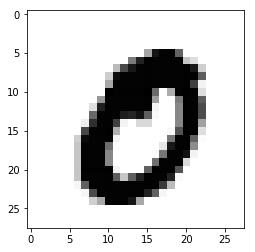

Label: [8]
Prediction: [1]


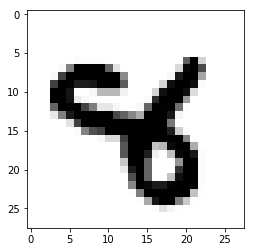

Label: [5]
Prediction: [1]


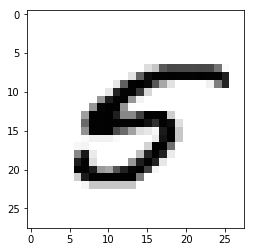

Label: [7]
Prediction: [1]


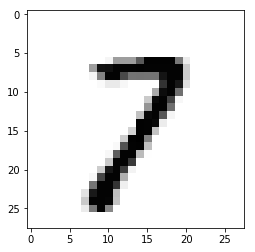

Label: [4]
Prediction: [1]


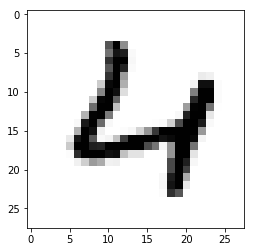

Label: [9]
Prediction: [1]


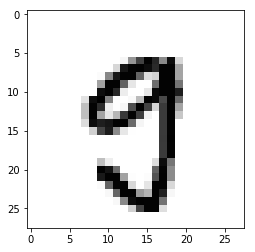

Label: [7]
Prediction: [1]


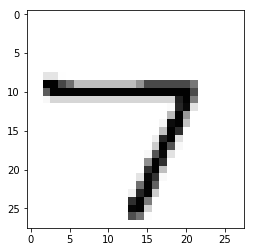

Label: [9]
Prediction: [1]


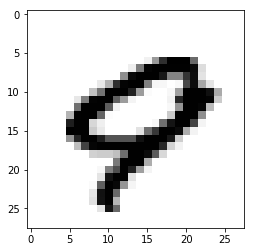

Label: [4]
Prediction: [1]


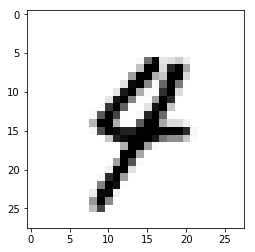

Label: [8]
Prediction: [1]


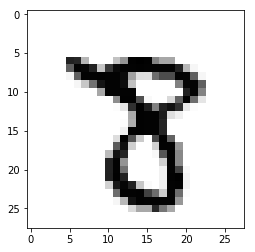

In [61]:
learning_rate = .1
training_epochs = 5
batch_size = 100

assert num_train_data % batch_size == 0

x = tf.placeholder(tf.float32, shape=[None, 784])    # image of shape 28 x 28 = 784
y = tf.placeholder(tf.float32, shape=[None, 10])     # 0..9 digits

W1 = tf.Variable(tf.zeros([784, 100]), name='weight1')
b1 = tf.Variable(tf.zeros([100]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.zeros([100, 50]), name='weight2')
b2 = tf.Variable(tf.zeros([50]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.zeros([50, 30]), name='weight3')
b3 = tf.Variable(tf.zeros([30]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.zeros([30, 10]), name='weight4')
b4 = tf.Variable(tf.zeros([10]), name='bias4')
activation = tf.sigmoid(tf.matmul(layer3, W4) + b4)

cost = -tf.reduce_mean(y * tf.log(activation) + (1 - y) * tf.log(1 - activation))

# W = tf.Variable(tf.zeros([784, 10]), name='weight')
# b = tf.Variable(tf.zeros([10]), name='bias')
# activation = tf.nn.softmax(tf.matmul(x, W) + b)
# cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), reduction_indices=1))

# activation = tf.sigmoid(tf.matmul(x, W) + b)
# cost = -tf.reduce_mean(y * tf.log(activation) + (1 - y) * tf.log(1 - activation))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):

        # Shuffle for each epoch
        perm = numpy.arange(num_train_data)
        numpy.random.shuffle(perm)
        train_images = train_images[perm]
        train_labels = train_labels[perm]

        average_cost = .0
        total_batch = int(num_train_data / batch_size)
        for i in range(total_batch):
            batch_xs = train_images[i*batch_size:(i+1)*batch_size]
            batch_ys = train_labels[i*batch_size:(i+1)*batch_size]
            sess.run(optimizer, feed_dict={x: batch_xs, y:batch_ys})

        average_cost += sess.run(cost, feed_dict={x: batch_xs, y:batch_ys}) / total_batch
        print(epoch, average_cost, sess.run(b))

    print('Optimization finished!')

    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print('Accuracy:', accuracy.eval({x: validation_images, y: validation_labels}))

    for _ in range(10):
        # Get one and predict
        r = random.randint(0, num_test_data-1)
        print('Label:', sess.run(tf.argmax(test_labels[r:r+1], 1)))
        print('Prediction:', sess.run(tf.argmax(activation, 1), {x: test_images[r:r+1]}))

        # Show the image
        plt.imshow(test_images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
        plt.show()
